# Домашнее задание "Центральная предельная теорема и статистика".

## Задание.

В этом задании нужно убедиться, что ЦПТ действительно работает.

Создайте случайную величину из [любого выбранного вами распределения](https://docs.scipy.org/doc/scipy/reference/stats.html), для разных значений `n` сгенерируйте 1000 выборок размера `n`. Постройте гистрограммы средних этих выборок и сделайте выводы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
rv = sts.gamma(a=1.99)
sample = rv.rvs(size=1000)

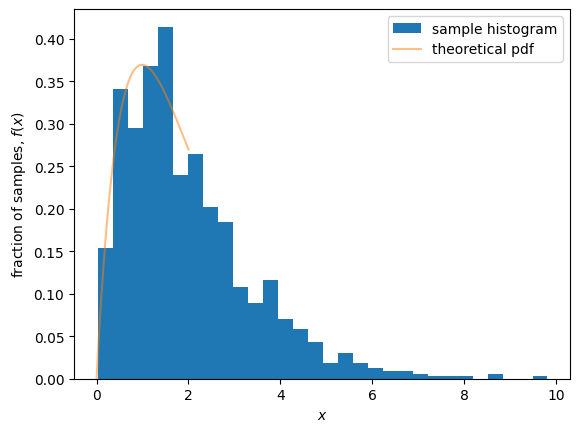

In [3]:
x = np.linspace(0,2,100)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=30, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

In [19]:
sample.mean()

1.9841012029190188

In [38]:
n_size = [2, 50, 500, 5000]                           # Размеры выборок
d = {}                                                # Словарь для сохранения средних по выборкам
samples_count = 1000                                  # Количество повторов генерации

for n in n_size:
  a = np.array([])
  for number in range(samples_count):
    sample = rv.rvs(size=n)
    a = np.append(a, sample.mean())
  d[n] = a

n: 2
Среднее значение: 1.958308443934248
Дисперсия: 0.8958103648679225


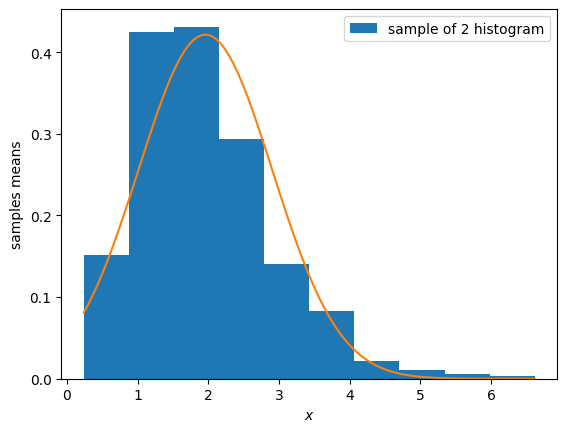

n: 50
Среднее значение: 1.9941124913587474
Дисперсия: 0.03944306250968937


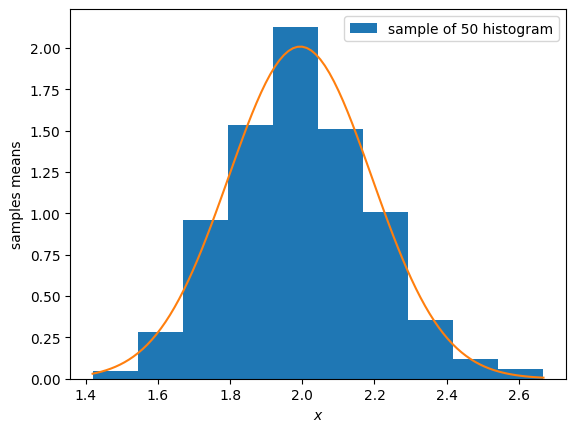

n: 500
Среднее значение: 1.992789498835117
Дисперсия: 0.0037234594347051388


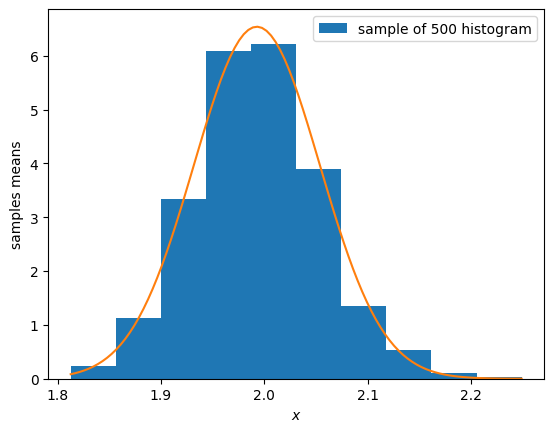

n: 5000
Среднее значение: 1.9899688754635187
Дисперсия: 0.00040090681224928945


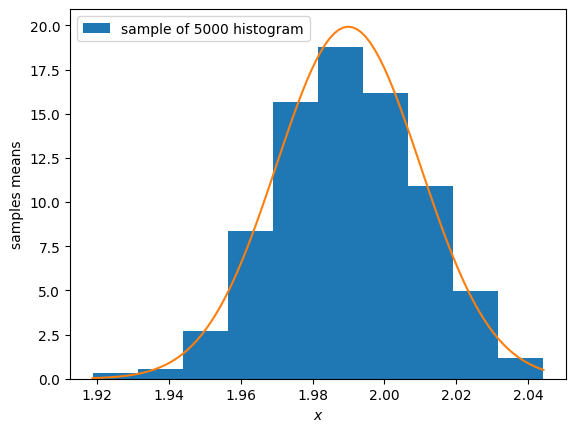

In [39]:
for n, means in d.items():
  label = 'sample of ' + str(n) + ' histogram'       # Подписи для графиков
  plt.hist(means, density=True, label=label)         # Строим графики

  x = np.linspace(min(means), max(means), 100)
  norm = sts.norm(means.mean(), np.sqrt(means.var()))
  plt.plot(x, norm.pdf(x))
  print(f'n: {n}\nСреднее значение: {means.mean()}\nДисперсия: {means.var()}')

  plt.legend()
  plt.ylabel('samples means')
  plt.xlabel('$x$')
  plt.show()

С увеличением размера выборок гистограмма начинается все больше напоминать нормальное распределение. Дисперсия уменьшается.